In [93]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from wordcloud import WordCloud, STOPWORDS 
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string
import matplotlib
from matplotlib import pyplot as plt

In [39]:
response = requests.get(url)
result_page = BeautifulSoup(response.content,'lxml')

In [55]:
premium = pd.read_csv('premium skincare products.csv')

In [56]:
premium

,Name,Intro,Type,Price,Rating
0,SkinMedica 2.0 Lytera Pigment Correcting Serum...,Lytera 2.0 is an advanced Pigment Correcting S...,Revitalizing face serum,154.0,5.0
1,SkinCeuticals' Discoloration Defense,SkinCeuticals' Discoloration Defense is clinic...,Revitalizing face serum,98.0,4.0
2,Schaf Revitalizing Serum,This all-in-one powerhouse serum firms and bri...,Revitalizing face serum,65.0,5.0
3,PCA Skin Pigment Gel,PCA Skin Pigment Gel diminishes hyperpigmentat...,Revitalizing face serum,64.0,4.0
4,PCA Skin Intensive Brightening Treatment: 0.5%...,Rejuvenate your complexion while you slumber w...,Revitalizing face serum,111.0,4.0
5,PCA Skin Intensive Clarity Treatment,PCA Skin Intensive Clarity Treatment alleviate...,Revitalizing face serum,111.0,5.0
6,PCA Skin Vitamin B3 Brightening Serum,"Safely brighten up oily, dry, combination and ...",Revitalizing face serum,115.0,5.0
7,Jan Marini's C-ESTA Face Serum,Brighten and rejuvenate your skin with Jan Mar...,Revitalizing face serum,114.0,5.0
8,Alastin RESTORATIVE SKIN COMPLEX,POWERFUL DAILY ANTI-AGING TREATMENT – more tha...,Revitalizing face serum,195.0,3.8
9,Evening Primrose + Green Tea Algae Retinol Oil,The Mara Evening Primrose + Green Tea Algae Re...,Revitalizing face serum,120.0,4.7


In [57]:
import plotly.figure_factory as ff

In [58]:
serum_price = premium[premium['Type'] == 'Revitalizing face serum']['Price']
facewash_price = premium[premium['Type'] == 'Dark spot correcting facewash']['Price']
cream_price = premium[premium['Type'] == 'Hydrating cream']['Price']
toner_price = premium[premium['Type'] == 'skin toner']['Price']

In [81]:
hist_data = [serum_price]
group_labels = ['Revitalizing face serum']
fig = ff.create_distplot(hist_data, group_labels, bin_size=4)
fig.show()

In [161]:
hist_data = [facewash_price]
group_labels = ['Dark spot correcting facewash']
fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.show()

In [169]:
hist_data = [cream_price]
group_labels = ['Hydrating cream']
fig = ff.create_distplot(hist_data, group_labels, bin_size=4)
fig.show()

In [168]:
hist_data = [toner_price]
group_labels = ['skin toner']
fig = ff.create_distplot(hist_data, group_labels, bin_size=2)
fig.show()

In [79]:
hist_data = [serum_price, facewash_price, cream_price, toner_price]
group_labels = ['Revitalizing face serum', 'Dark spot correcting facewash', 'Hydrating cream', 'skin toner']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.3, show_hist=False)
fig.show()

In [ ]:
# Conclusion: Among the four types of premium skincare products for Black people, the price distribution for 'Dark spot correcting facewash' is the most concentrated, followed by 'skin toner', 'Revitalizing face serum' and 'Hydrating cream'.
# Meanwhile, the average price for 'Hydrating cream' is the highest, followed by 'Revitalizing face serum', 'skin toner' and 'Dark spot correcting facewash'.

In [82]:
serum_df = premium[premium['Type'] == 'Revitalizing face serum']
facewash_df = premium[premium['Type'] == 'Dark spot correcting facewash']
cream_df = premium[premium['Type'] == 'Hydrating cream']
toner_df = premium[premium['Type'] == 'skin toner']

In [87]:
def preprocess_data(raw_text):
    texts = []
    stop_words = set(stopwords.words('english')) 
    p_stemmer = PorterStemmer()
    for i in raw_text:
        if type(i) == str:
            word_tokens = word_tokenize(i.lower().strip().translate(str.maketrans('', '', string.punctuation)))
            stopped_tokens = [i for i in word_tokens if not i in stop_words]
            stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
            texts.append(stemmed_tokens)
        else:
            continue
    return texts

In [95]:
def get_wordcloud(delete_words, text_list):
    clean_text = preprocess_data(text_list)
    text = ','.join([','.join(item) for item in clean_text])
    # Remove unwanted words
    for word in delete_words:
        text = text.replace(word,' ')
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=4000,height=4000,max_words=50).generate(text)
    # plot WordCloud
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [111]:
def get_freq_word(delete_words, text_list):
    clean_text = preprocess_data(text_list)
    text = ','.join([','.join(item) for item in clean_text])
    # Remove unwanted words
    for word in delete_words:
        text = text.replace(word,'')
    text_list = text.split(',')
    most_freq = FreqDist(text_list).most_common(25)
    return most_freq

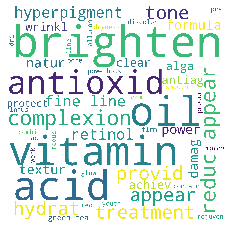

In [139]:
serum_text_1 = list(serum_df[serum_df['Rating'] > 4.5]['Intro'])
get_wordcloud(['serum', 'face', 'skin', 'even', 'help'], serum_text_1)

In [140]:
serum_freq = get_freq_word(['serum', 'face', 'skin', 'even', 'help'], serum_text_1)
list(zip(*serum_freq))[0]

('',
 'appear',
 'brighten',
 'reduc',
 'oil',
 'vitamin',
 'line',
 'acid',
 'antioxid',
 'c',
 'complexion',
 'tone',
 'provid',
 'hydrat',
 'treatment',
 'hyperpigment',
 'retinol',
 'fine',
 '20',
 'textur',
 'natur',
 'power',
 'formula',
 'green',
 'tea')

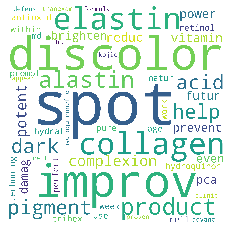

In [141]:
serum_text_0 = list(serum_df[serum_df['Rating'] <= 4.5]['Intro'])
get_wordcloud(['serum', 'face', 'skin', 'treatment'], serum_text_0)

In [142]:
serum_freq = get_freq_word(['serum', 'face', 'skin', 'treatment'], serum_text_0)
list(zip(*serum_freq))[0]

('',
 'spot',
 '–',
 'discolor',
 'improv',
 'collagen',
 'elastin',
 'product',
 'alastin',
 'dark',
 'acid',
 'pigment',
 'help',
 'complexion',
 'potent',
 'reduc',
 'power',
 'vitamin',
 'brighten',
 'pca',
 'prevent',
 'futur',
 'damag',
 'even',
 'hydroquinon')

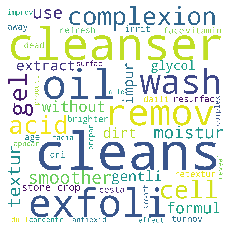

In [143]:
facewash_text_1 = list(facewash_df[facewash_df['Rating'] > 4.5]['Intro'])
get_wordcloud(['facewash', 'skin', 'help'], facewash_text_1)

In [144]:
facewash_freq = get_freq_word(['facewash', 'skin', 'help'], facewash_text_1)
list(zip(*facewash_freq))[0]

('',
 'cleans',
 'cleanser',
 'oil',
 'exfoli',
 'remov',
 'wash',
 'complexion',
 'acid',
 'cell',
 'gel',
 'smoother',
 'textur',
 'moistur',
 'use',
 'without',
 'formul',
 'gentli',
 'dirt',
 'impur',
 'stone',
 'crop',
 'extract',
 'glycol',
 'away')

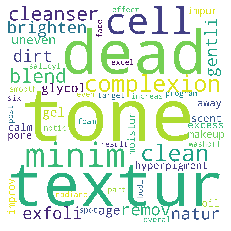

In [147]:
facewash_text_0 = list(facewash_df[facewash_df['Rating'] <= 4.5]['Intro'])
get_wordcloud(['facewash', 'skin', 'thing', 'feel', 'help'], facewash_text_0)

In [148]:
facewash_freq = get_freq_word(['facewash', 'skin', 'thing', 'feel', 'help'], facewash_text_0)
list(zip(*facewash_freq))[0]

('',
 'tone',
 'textur',
 'dead',
 'cell',
 'minim',
 'complexion',
 'cleanser',
 'blend',
 'brighten',
 'gentli',
 'remov',
 'dirt',
 'exfoli',
 'natur',
 'glycol',
 'gel',
 'uneven',
 'age',
 'hyperpigment',
 'scent',
 'clean',
 'away',
 'excess',
 'makeup')

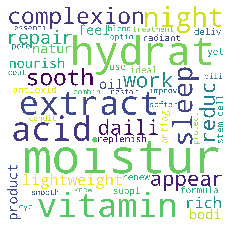

In [126]:
cream_text_1 = list(cream_df[cream_df['Rating'] > 4.5]['Intro'])
get_wordcloud(['cream', 'skin', 'help'], cream_text_1)

In [127]:
cream_freq = get_freq_word(['cream', 'skin', 'help'], cream_text_1)
list(zip(*cream_freq))[0]

('',
 'moistur',
 'hydrat',
 'extract',
 'vitamin',
 'acid',
 'night',
 'sleep',
 'complexion',
 'sooth',
 'daili',
 'work',
 'reduc',
 'appear',
 'repair',
 'lightweight',
 'rich',
 'nourish',
 'feel',
 'oil',
 'product',
 'bodi',
 'natur',
 'replenish',
 'radiant')

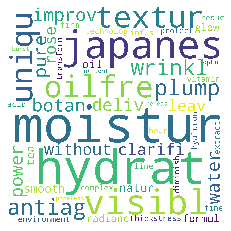

In [129]:
cream_text_0 = list(cream_df[cream_df['Rating'] <= 4.5]['Intro'])
get_wordcloud(['cream', 'skin', 'help'], cream_text_0)

In [130]:
cream_freq = get_freq_word(['cream', 'skin', 'help'], cream_text_0)
list(zip(*cream_freq))[0]

('',
 'moistur',
 'hydrat',
 'japanes',
 'visibl',
 'oilfre',
 'uniqu',
 'textur',
 'antiag',
 'plump',
 'wrinkl',
 'water',
 'improv',
 'power',
 'botan',
 'pure',
 'deliv',
 'without',
 'leav',
 'clarifi',
 'rose',
 'smooth',
 'oil',
 'natur',
 'tea')

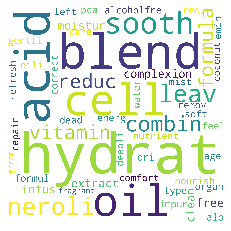

In [133]:
toner_text_1 = list(toner_df[toner_df['Rating'] > 4.5]['Intro'])
get_wordcloud(['toner', 'skin', 'help', 'use'], toner_text_1)

In [134]:
toner_freq = get_freq_word(['toner', 'skin', 'help', 'use'], toner_text_1)
list(zip(*toner_freq))[0]

('',
 'hydrat',
 'acid',
 'blend',
 'cell',
 'oil',
 'sooth',
 'neroli',
 'leav',
 'combin',
 'vitamin',
 'reduc',
 'formula',
 'complexion',
 'moistur',
 'extract',
 'free',
 'infus',
 'pca',
 'nutrient',
 'nourish',
 'formul',
 'remov',
 'dead',
 'impur')

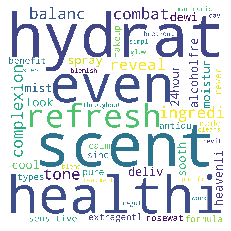

In [137]:
toner_text_0 = list(toner_df[toner_df['Rating'] <= 4.5]['Intro'])
get_wordcloud(['toner', 'skin', 'help', 'use', 'set'], toner_text_0)

In [138]:
toner_freq = get_freq_word(['toner', 'skin', 'help', 'use', 'set'], toner_text_0)
list(zip(*toner_freq))[0]

('',
 'hydrat',
 'scent',
 'healthi',
 'refresh',
 'ingredi',
 'tone',
 'balanc',
 'complexion',
 'reveal',
 'combat',
 'sooth',
 'alcoholfre',
 'spray',
 'deliv',
 'heavenli',
 'cool',
 'mist',
 'moistur',
 '24hour',
 'dewi',
 'look',
 'extragentl',
 'formula',
 'types—even')